# Digitale Modulation

Dieses 'Arbeitsblatt' demonstriert verschiedene digitale Modulationsarten.

## Amplitudenumtastung (ASK)

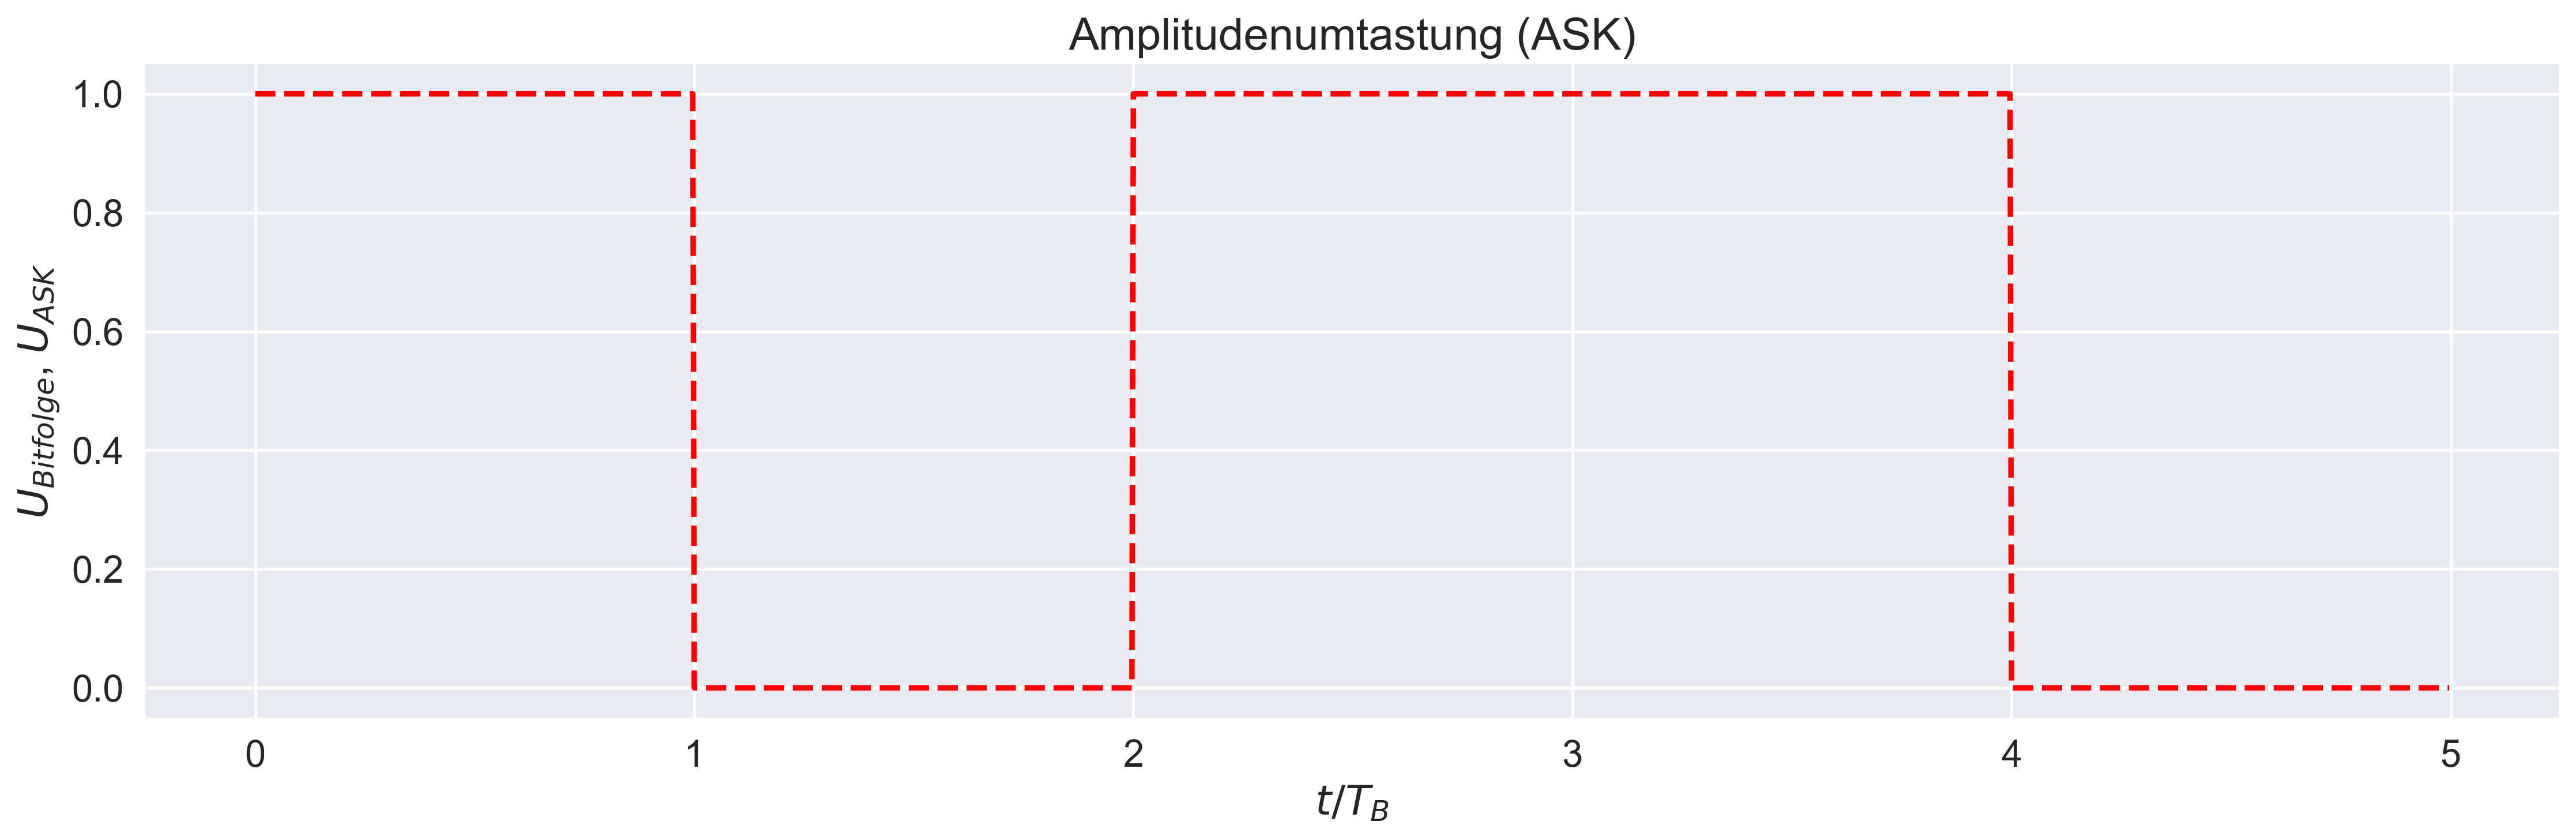

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {'axes.grid' : True})
sns.set_context("talk", font_scale=1.2)
%matplotlib inline

Bitfolge = np.array([1, 0, 1, 1, 0]).astype(float)

Fs = 300.0;                   # Abtastrate in Hz
t = np.arange(0,len(Bitfolge),1/Fs)

Modulationsgrad=0.0
Trägerfrequenz=10     # in Hertz

# Dirty code: Modulationsgrad (muss noch eleganter gelöst werden)
bf = np.copy(Bitfolge) # erzeuge Kopie, um das unverfälschte Original plotten zu können
for n, i in enumerate(bf):
    if i == 0:
        bf[n] = Modulationsgrad

SamplesProBit = len(Bitfolge)*Fs/bf.size 
dd = np.repeat(bf, SamplesProBit)
dd_orig = np.repeat(Bitfolge, SamplesProBit)
y= dd*np.cos(2 * np.pi * Trägerfrequenz * t)

plt.figure(figsize=(18,5),dpi=300)
#plt.plot(t,y)
plt.plot(t,dd_orig, 'r--')
plt.ylabel('$U_{Bitfolge}$, $U_{ASK}$')
plt.xlabel('$t/T_B$')
plt.title('Amplitudenumtastung (ASK)')

## Frequenzumtastung (FSK)

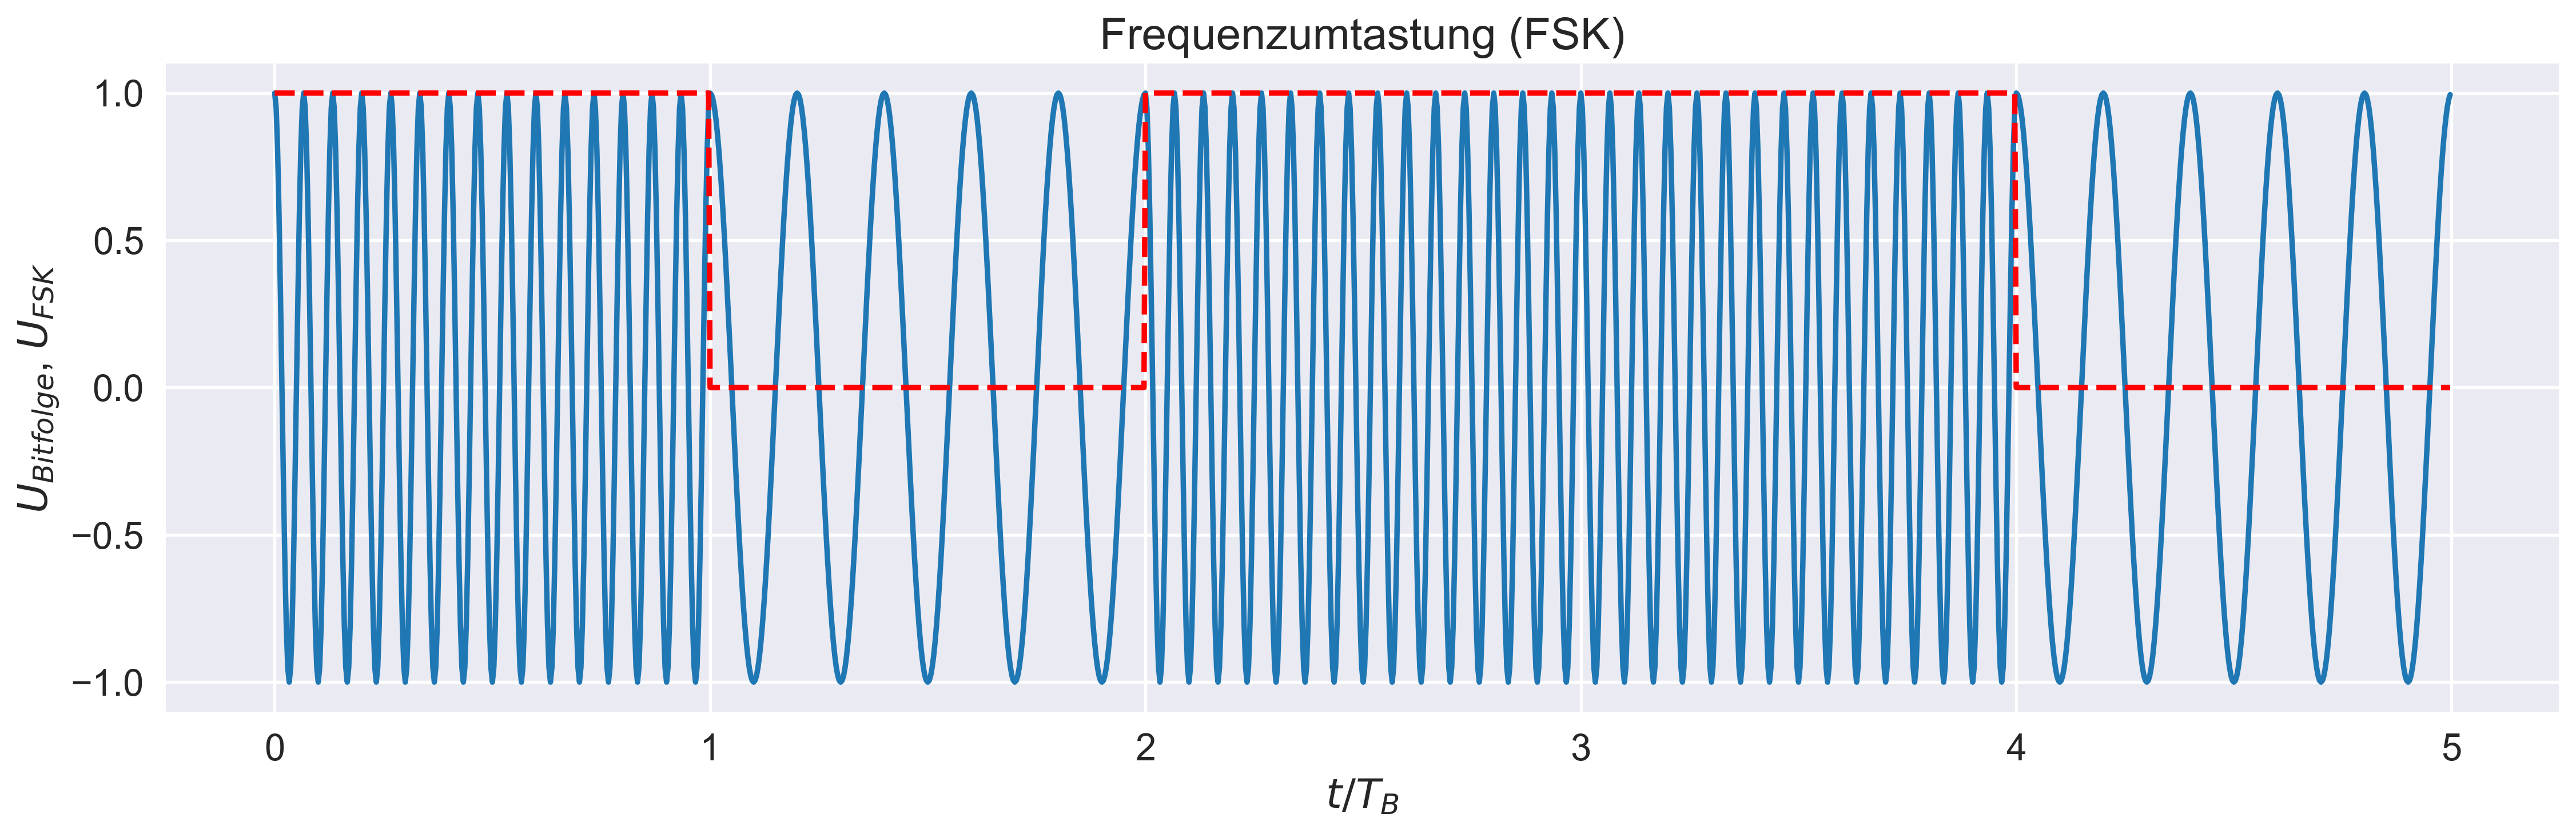

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {'axes.grid' : True})
sns.set_context("talk", font_scale=1.2)
%matplotlib inline

Bitfolge = np.array([1, 0, 1, 1, 0])

Fs = 300.0;                           # Abtastrate
t = np.arange(0,len(Bitfolge),1/Fs)   # Zeitvektor
freq=10                               # Trägerfrequenz

# Dirty code: Austausch von Bits gegen fixe Differenzwerte (kann noch verbessert werden)
bf = np.copy(Bitfolge)
for n, i in enumerate(bf):
    if i == 1:
        bf[n] = 5   # Trägerfrequenz + 5 Hz => logisch '1' (= 15Hz)
    elif i == 0:
        bf[n] = -5  # Trägerfrequenz - 5 Hz => logisch '0' (= 5Hz)

SamplesProBit = len(Bitfolge)*Fs/bf.size 
dd = np.repeat(bf, SamplesProBit)
dd_orig = np.repeat(Bitfolge, SamplesProBit)
y= np.cos(2 * np.pi * (freq + dd) * t)

plt.figure(figsize=(18,5), dpi=300)
plt.plot(t,y)
plt.plot(t,dd_orig, 'r--')
plt.ylabel('$U_{Bitfolge}$, $U_{FSK}$')
plt.xlabel('$t/T_B$')
plt.title('Frequenzumtastung (FSK)')

## Phasenumtastung (PSK)

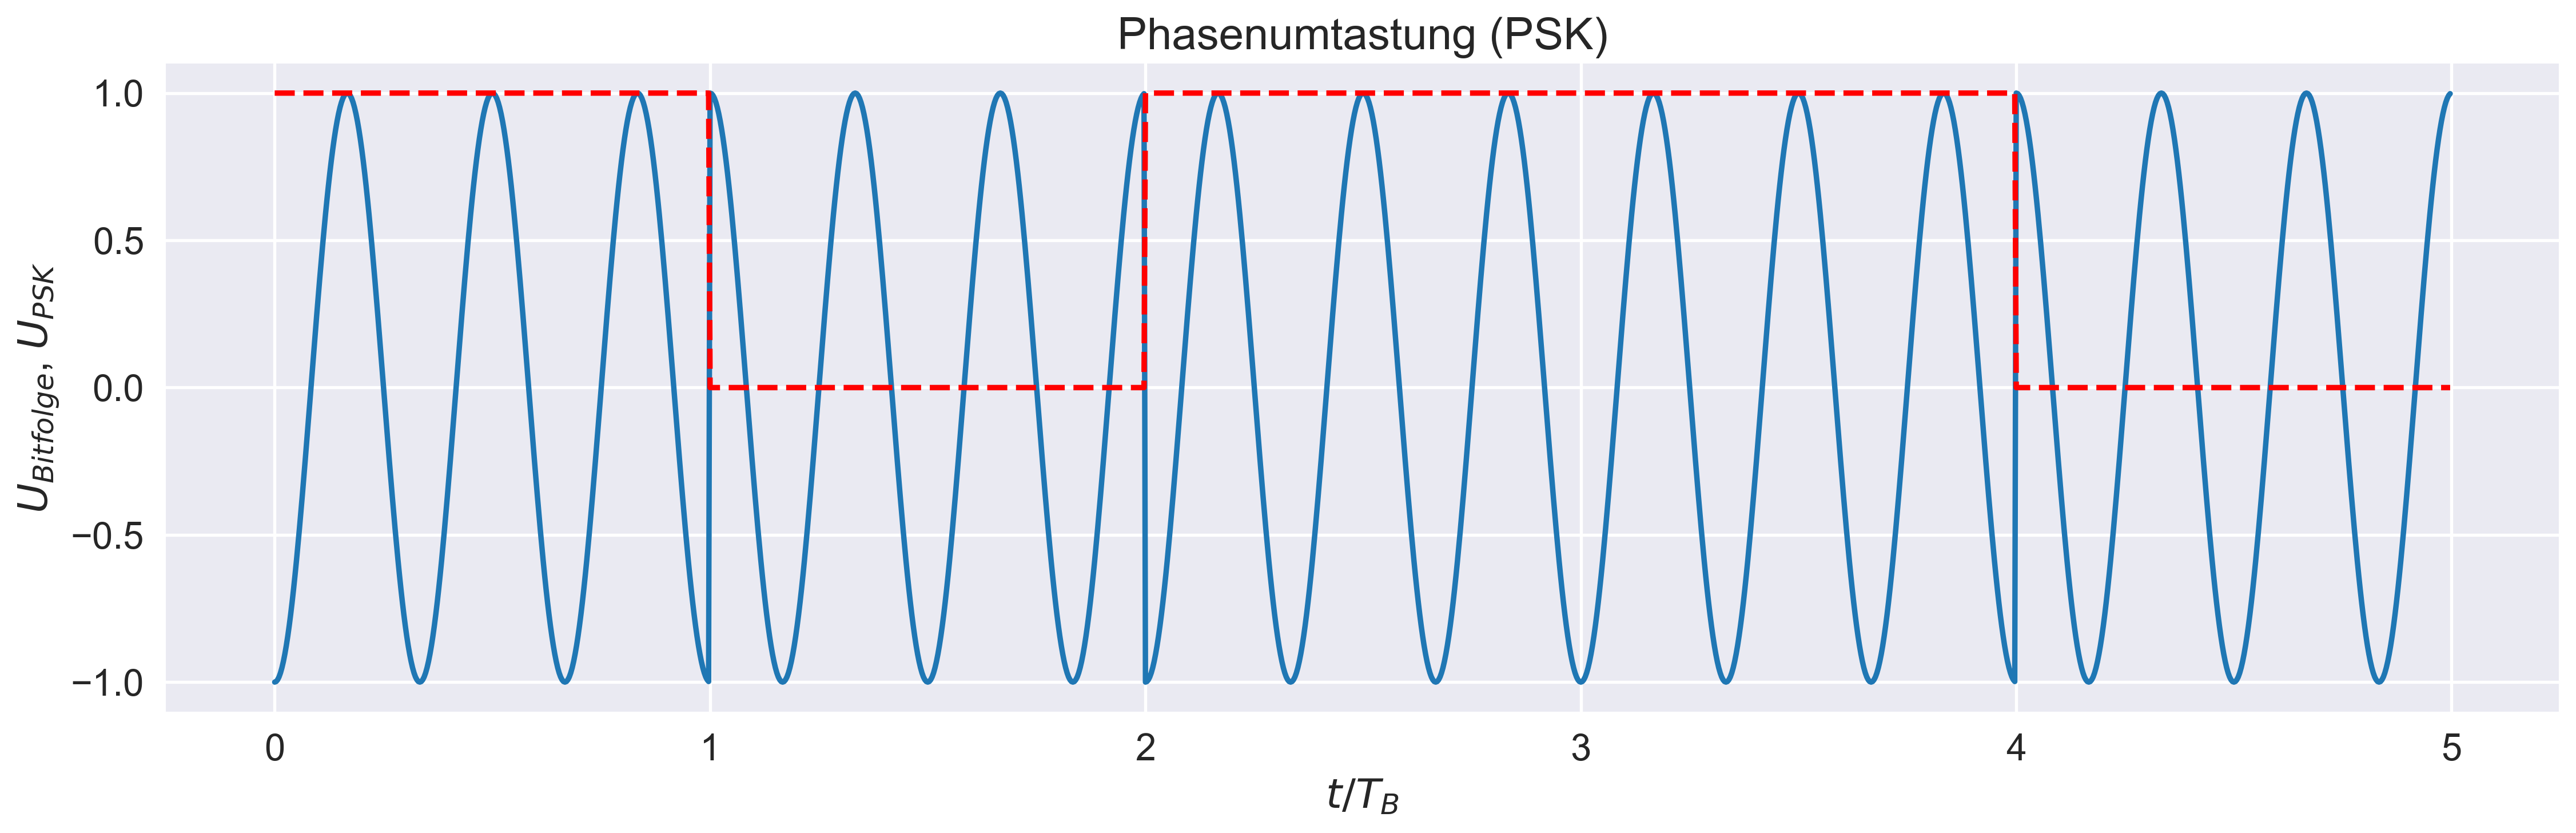

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {'axes.grid' : True})
sns.set_context("talk", font_scale=1.2)
%matplotlib inline

Bitfolge = np.array([1, 0, 1, 1, 0])

Fs = 300.0;                           # Abtastrate
t = np.arange(0,len(Bitfolge),1/Fs)   # Zeitvektor
freq=3                                # Trägerfrequenz in Hz (kleinere Frequenzen erhöhen lesbarkeit)

# Dirty code: Austauschen von Bits gegen Phasen (muss noch verschönert werden)
bf = np.copy(Bitfolge)
for n, i in enumerate(bf):
    if i == 1:
        bf[n] = 180

SamplesProBit = len(Bitfolge)*Fs/bf.size
dd = np.repeat(bf, SamplesProBit)
dd_orig = np.repeat(Bitfolge, SamplesProBit)
y= np.cos(2 * np.pi * (freq) * t+(np.pi*dd/180))

plt.figure(figsize=(18,5),dpi=300)
plt.plot(t,y)
plt.plot(t,dd_orig, 'r--')
plt.ylabel('$U_{Bitfolge}$, $U_{PSK}$')
plt.xlabel('$t/T_B$')
plt.title('Phasenumtastung (PSK)')